# creating the dataset

Search for something in [Google Images](images.google.com), then hit Ctrl + SHIFT + I, paste this snippet of code:

```
urls = Array.from(document.querySelectorAll(".rg_di .rg_meta")).map(el=>JSON.parse(el.textContent).ou);
window.open("data:text/csv;charset=utf-8," + escape(urls.join("\n")));
```

to download a CSV with links of the images

In [1]:
from fastai import *
from fastai.vision import *

In [11]:
folder = "Articuno"
file = "articuno.csv"

In [8]:
folder = "Moltres"
file = "moltres.csv"

In [4]:
folder = "Zapdos"
file = "zapdos.csv"

In [17]:
folder = "Not_legendary_bird"
file = "not_legendary_bird.csv"

In [18]:
path = Path("data/")
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [19]:
download_images(path/file, dest)

In [20]:
classes = ["Articuno", "Moltres", "Zapdos", "Not_legendary_bird"]

In [21]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

In [22]:
np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, train=".", valid_pct=0.2,
    ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [23]:
data.classes

['Articuno', 'Moltres', 'Not_legendary_bird', 'Zapdos']

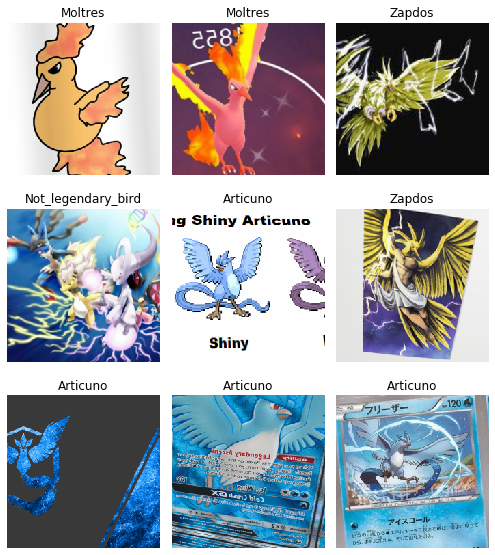

In [24]:
data.show_batch(rows=3, figsize=(7, 8))

In [25]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Articuno', 'Moltres', 'Not_legendary_bird', 'Zapdos'], 4, 1240, 309)

# define a model

In [26]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/jayme/miniconda3/envs/fastai/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.112237,0.388024,0.122977,00:25
1,0.751016,0.364128,0.122977,00:24
2,0.570473,0.372650,0.122977,00:24
3,0.465653,0.365645,0.119741,00:24


In [28]:
learn.save("stage-1")

In [29]:
learn.unfreeze()

In [30]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


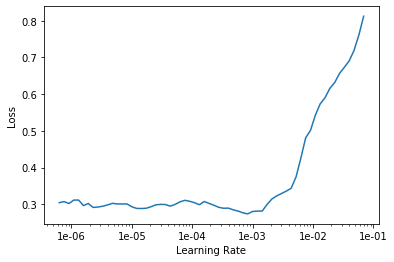

In [31]:
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(2, max_lr=slice(1e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.344517,0.471605,0.135922,00:25
1,0.254067,0.382358,0.113269,00:25


In [33]:
learn.fit_one_cycle(3, max_lr=slice(1e-4, 5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.142700,0.426293,0.116505,00:24
1,0.140308,0.405948,0.113269,00:24
2,0.109787,0.402837,0.100324,00:25


In [34]:
learn.save("stage-2")

In [35]:
learn.freeze()

In [38]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.080688,0.410619,0.093851,00:24
1,0.084171,0.413580,0.097087,00:24


In [41]:
learn.export("pokemon_clf.pkl")

# interpretation

In [42]:
interp = ClassificationInterpretation.from_learner(learn)

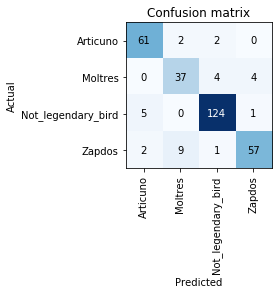

In [43]:
interp.plot_confusion_matrix()